In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import plotly.graph_objects as go
from sklearn.cluster import KMeans
import seaborn as sns



Importing the dataset

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()
x = df.iloc[:,[3,4]].values


Using Dendrogram to find the optimal number of clusters

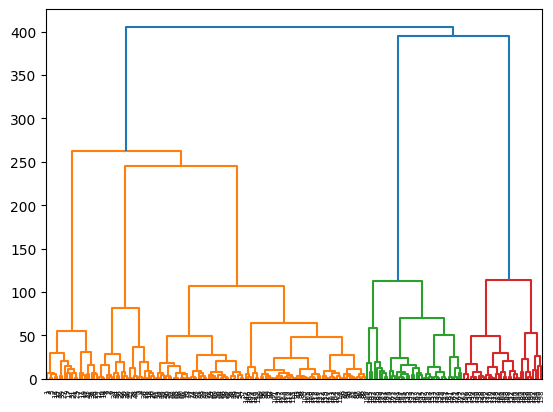

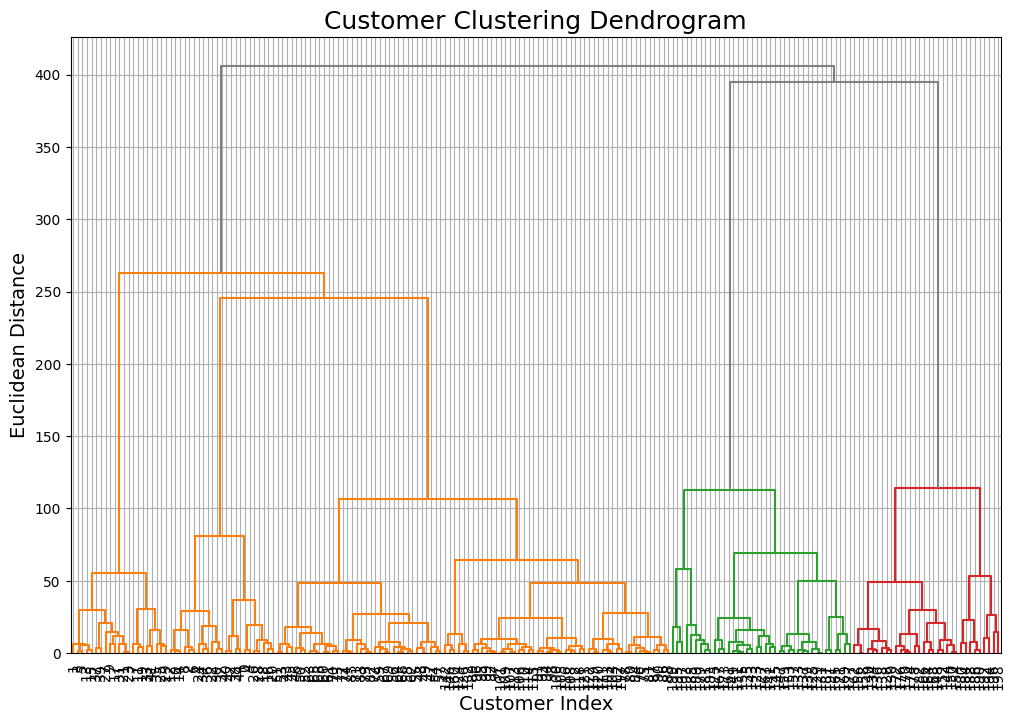

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(x,method = 'ward')) # minimizing variance in clusters
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Generate the linkage matrix
linkage_matrix = sch.linkage(x, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))  # Increase the size of the figure
dendrogram = sch.dendrogram(linkage_matrix,
                            leaf_rotation=90,  # Rotate labels for better readability
                            leaf_font_size=10,  # Adjust the font size of the labels
                            color_threshold=0.7*max(linkage_matrix[:, 2]),  # Color coding
                            above_threshold_color='grey')  # Color above threshold

plt.title('Customer Clustering Dendrogram', fontsize=18)
plt.xlabel('Customer Index', fontsize=14)
plt.ylabel('Euclidean Distance', fontsize=14)
plt.grid(True)  # Add grid lines
plt.show()


Training the Hierchial Agglomerative model on the dataset

In [ ]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)
display(y_hc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Visualising the clusters with different type of optimization applied to the initial visualization

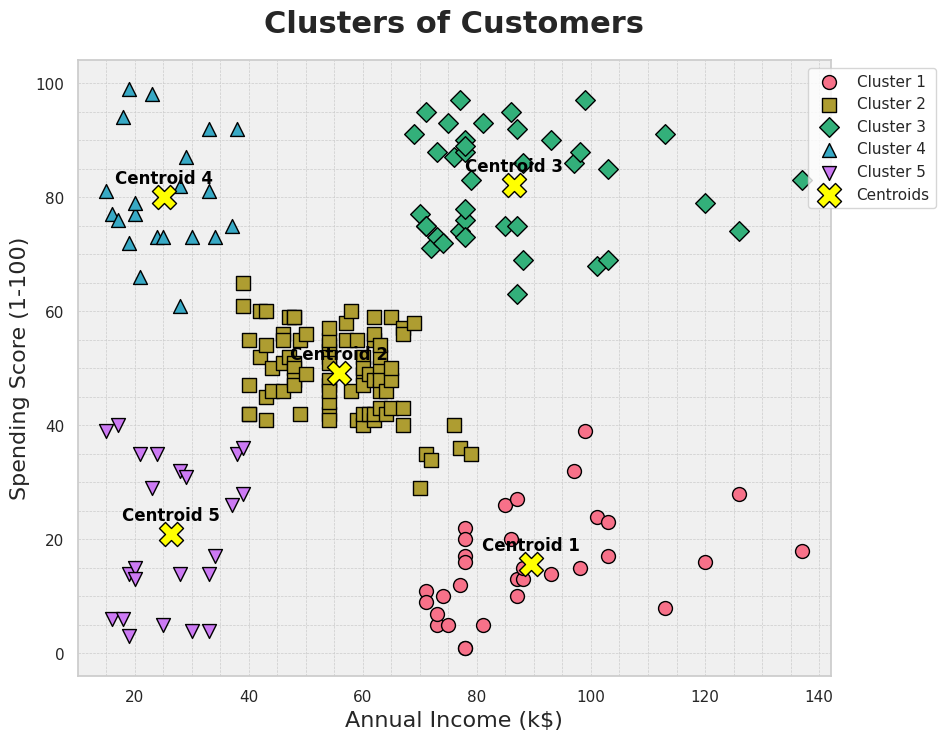

In [ ]:
# Set the style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Plot each cluster with improved colors and markers
colors = sns.color_palette("husl", 5)  # 5 different colors from seaborn
markers = ['o', 's', 'D', '^', 'v']

for i in range(5):
    plt.scatter(x[y_hc == i, 0], x[y_hc == i, 1],
                s=100, c=[colors[i]], marker=markers[i], label=f'Cluster {i + 1}', edgecolor='black')

# Compute the central points of each cluster for annotation
def compute_cluster_centers(data, labels):
    centers = []
    for label in np.unique(labels):
        cluster_data = data[labels == label]
        center = np.mean(cluster_data, axis=0)  # Compute mean as a representative point
        centers.append(center)
    return np.array(centers)

cluster_centers = compute_cluster_centers(x, y_hc)

# Plot the computed central points with a distinct marker and color
centroid_scatter = plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
                               s=300, c='yellow', edgecolor='black', marker='X', label='Centroids')

# Annotate the central points
for i, center in enumerate(cluster_centers):
    plt.annotate(f'Centroid {i + 1}', (center[0], center[1]),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12, color='black', weight='bold')

# Title and labels with increased size and weight
plt.title('Clusters of Customers', fontsize=22, weight='bold', pad=20)
plt.xlabel('Annual Income (k$)', fontsize=16)
plt.ylabel('Spending Score (1-100)', fontsize=16)

# Set axis limits and aspect ratio
plt.xlim(min(x[:, 0]) - 5, max(x[:, 0]) + 5)
plt.ylim(min(x[:, 1]) - 5, max(x[:, 1]) + 5)
plt.gca().set_aspect('equal', adjustable='box')

# Show custom legend
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Enhanced grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()

# Add a subtle background color
plt.gca().set_facecolor('#f0f0f0')

# Display the plot
plt.show()
